In [2]:
import sys
sys.path.append('C:/Users/lisah/Documents/Repos/ma-code')
from src.plots_ll_fish import *

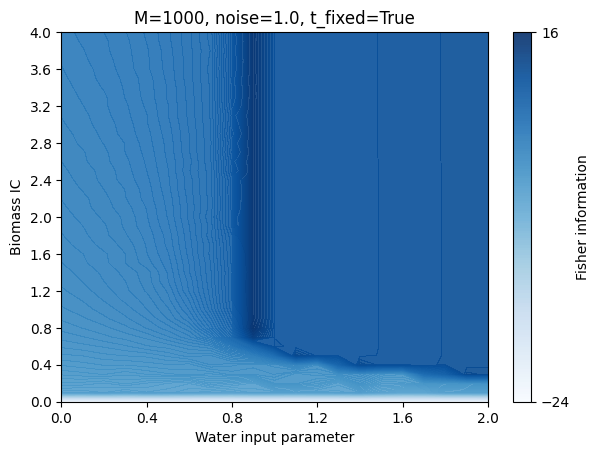

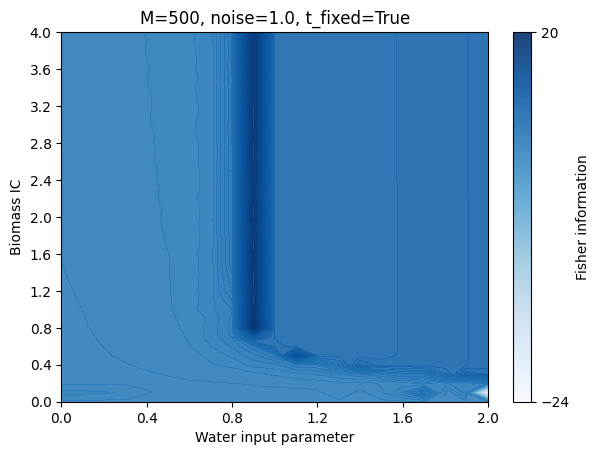

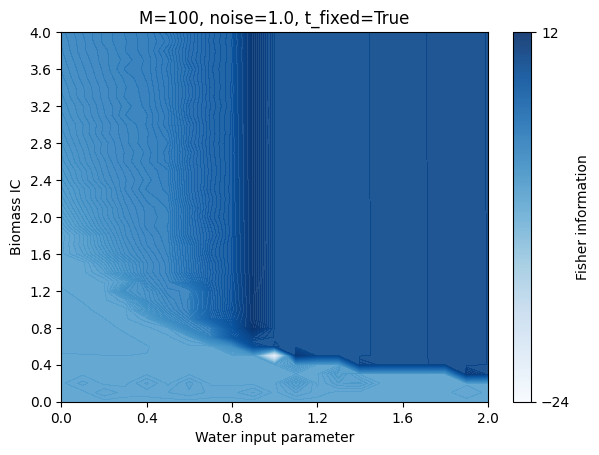

In [ ]:
def read_fish_file(w0, M, noise, path_to_file):
    """
    read in the fish file stored in a specific format
    """
    name="fish"+"_"+str(w0)+"_"+str(M)+"_"+str(noise)
    ending=".csv"
    csv = np.genfromtxt (path_to_file+name+ending, skip_header=1, delimiter=",")
    return csv

def make_all_fish_plots(M_vals, noise_vals, w0, path_to_read, path_to_store, t_fixed, store=False, log=True):
    """
    create (and store) fisher plots for all parameter combinations.

    Args:
        M_vals: M values for which fi should be plotted
        noise_vals: noise values for which fi should be plotted
        path_to_read: path to folder where data is stored
        path_to_store: path to folder where plot should be stored
        t_fixed: True if observation time window is fixed
        store: set True if plot should be saved as pdf
        log: if True logarithm is applied to data (when values are high)
    """
    for M in M_vals:
        for noise in noise_vals:
            
            csv = read_fish_file(w0,M,noise,path_to_read)
            fig, ax = plt.subplots()
            make_fish_plot(fig, ax, csv, log)
            #bif_plot(ax,m)
            ax.set_title(f"M={M}, noise={noise}, t_fixed={t_fixed}")

            if store: 
                plt.savefig(f"{path_to_store}fish_{w0}_{m}_{M}_{noise}.pdf", bbox_inches='tight')


# Plots of the Fisher information of inferred m parameter
M_vals = [1000,500,100]
noise_vals = [1.0]
w0=0.95
store=False
t_fixed=True
log=True

path_to_read= f"c:/Users/lisah/Documents/Repos/ma-code/data/t_fixed/t500/fisher_m/"
path_to_store=""

make_all_fish_plots(M_vals, noise_vals,w0,path_to_read,path_to_store, t_fixed, store, log)

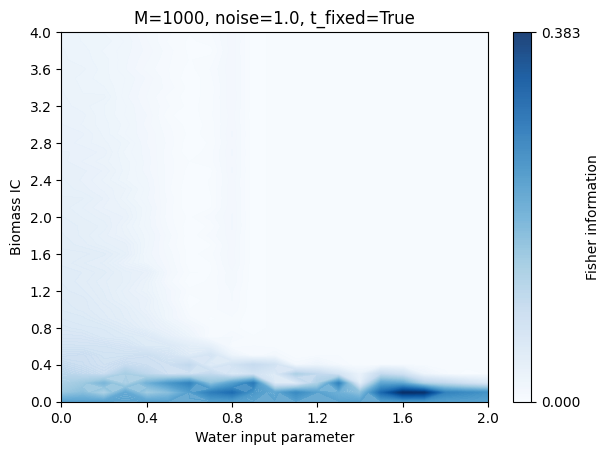

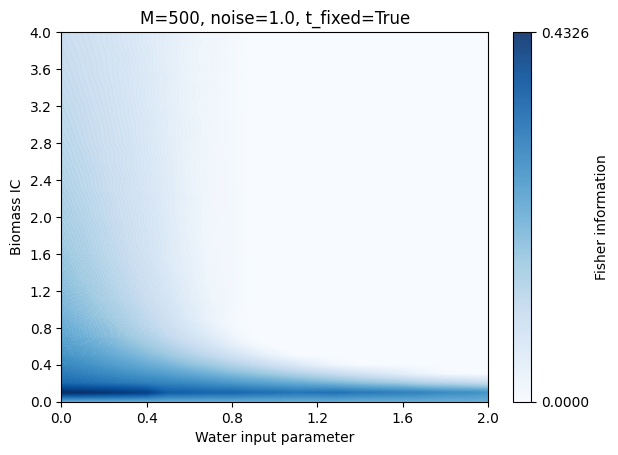

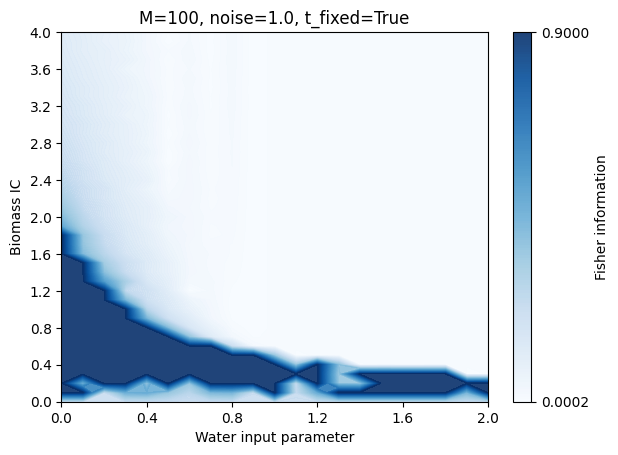

In [38]:
def read_fish_file(w0, M, noise, path_to_file):
    """
    read in the fish file stored in a specific format
    """
    name="mle"+"_"+str(w0)+"_"+str(M)+"_"+str(noise) # changed this line fish->mle
    ending=".csv"
    csv = np.genfromtxt (path_to_file+name+ending, skip_header=1, delimiter=",")
    return csv

def make_fish_plot(fig, ax, csv, log=True):
    """
    create single fisher plot on whole prm grid

    Args:
        `csv`: returned by read_fish_file
        `log`: if True logarithm is applied to data (when values are high)
    """
    if log:
        min_val = np.min(csv)
        if min_val <= 0:
            csv = csv - min_val + 1e-10  # Shift all values so the minimum becomes ~0+

        # take log data bec values are very high
        csv = np.log(csv)

    # points at which fish data is evaluated
    a_x_ticks = np.arange(0.0, 2.1, 0.1)
    inits_y_ticks = np.arange(0.0, 4.1, 0.1)

    # all values below -8 are mapped to -8
    levels = np.linspace(np.min(csv),  np.max(csv),150) # REMOVE FLOORING 

    #ax.grid(color='grey', linestyle='-',alpha=0.1, linewidth=1)
    #ax.set_facecolor('white')
    contouring=ax.contourf(a_x_ticks, inits_y_ticks, csv,30,cmap='Blues',alpha=0.9, levels=levels)
    ax.set_yticks(inits_y_ticks[::4])
    ax.set_xticks(a_x_ticks[::4])
    ax.set_xlabel("Water input parameter")
    ax.set_ylabel("Biomass IC")
    cbar = fig.colorbar(contouring,fraction=0.09)
    cbar.ax.set_ylabel('Fisher information')
    cbar.set_ticks([np.min(csv), np.max(csv)]) # ADJUST LEVELS
    return contouring

def make_all_fish_plots(M_vals, noise_vals, w0, path_to_read, path_to_store, t_fixed, store=False, log=True):
    """
    create (and store) fisher plots for all parameter combinations.

    Args:
        M_vals: M values for which fi should be plotted
        noise_vals: noise values for which fi should be plotted
        path_to_read: path to folder where data is stored
        path_to_store: path to folder where plot should be stored
        t_fixed: True if observation time window is fixed
        store: set True if plot should be saved as pdf
        log: if True logarithm is applied to data (when values are high)
    """
    for M in M_vals:
        for noise in noise_vals:
            
            csv = np.abs(read_fish_file(w0,M,noise,path_to_read) -0.45)
            fig, ax = plt.subplots()
            make_fish_plot(fig, ax, csv, log)
            #bif_plot(ax,m)
            ax.set_title(f"M={M}, noise={noise}, t_fixed={t_fixed}")

            if store: 
                plt.savefig(f"{path_to_store}fish_{w0}_{m}_{M}_{noise}.pdf", bbox_inches='tight')


# Plots of the absolute difference between mle values and true m=0.45
# high values are bad-> means that estimate is far away from true value
M_vals = [1000,500,100]
noise_vals = [1.0]
w0=0.95
store=False
t_fixed=True
log=False

path_to_read= f"c:/Users/lisah/Documents/Repos/ma-code/data/t_fixed/t500/fisher_m/"
path_to_store=""

make_all_fish_plots(M_vals, noise_vals,w0,path_to_read,path_to_store, t_fixed, store, log)